win10上装basemap : conda install basemap   
提示basemap需要python2.7,但mac上python3是可以装basemap的.   
解决方案:    
conda install -c conda-forge basemap

In [ ]:
参考:    
https://zhuanlan.zhihu.com/p/37336863    
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html      推荐


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

(925,
 5,
 [73.44696044921875, 6.318641185760498, 0.0, 0.0],
 [135.08583068847656, 53.557926177978516, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1a78ba6e1d0>)

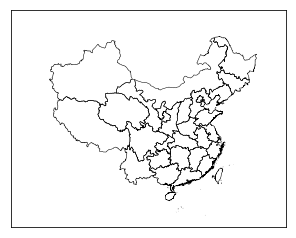

In [27]:
# 实例化地图对象，并导入本地shp中国地图
basemap = Basemap(llcrnrlon= 75,llcrnrlat=10,urcrnrlon=150,urcrnrlat=55,projection='poly',lon_0 = 116.65,lat_0 = 40.02)
basemap.readshapefile(shapefile = "./bou2_4p",name = "china")

In [30]:
mydata = pd.read_excel('各单位地理位置分布.xlsx',sheet_name = 'Sheet1')
mydata.head(10)

,编号,医院名称,省,市,地区,经度,纬度,病例量
0,1,第二军医大学东方肝胆外科医院,上海市,上海市,华东,121.460147,31.20408,18305
1,2,北京大学肿瘤医院,北京市,北京市,华北,116.295817,39.92915,807


In [15]:
# 导入的shp格式地图中很多行政区划信息乱码，需要纠正编码
mapData = pd.DataFrame(basemap.china_info)
mapData["NAME"] = mapData["NAME"].map(lambda x: x.decode("gbk") if len(x) != 0 else x)
#mapData["NAME"] = [i.decode("gbk") if len(i) !=0 else i for i in mapData["NAME"].tolist()]
mapData = mapData.merge(mydata,how = "left",left_on='NAME', right_on="省")

In [17]:
mapData.head(10)

,ADCODE93,ADCODE99,AREA,BOU2_4M_,BOU2_4M_ID,NAME,PERIMETER,RINGNUM,SHAPENUM,编号,医院名称,省,市,地区,经度,纬度,病例量
0,230000,230000,54.447,2,23,黑龙江省,68.489,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150000,150000,129.113,3,15,内蒙古自治区,129.933,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,650000,650000,175.591,4,65,新疆维吾尔自治区,84.905,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,220000,220000,21.315,5,22,吉林省,41.186,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,210000,210000,15.603,6,21,辽宁省,38.379,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,620000,620000,41.508,7,62,甘肃省,76.781,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,130000,130000,19.504,8,13,河北省,44.874,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,110000,110000,1.733,9,11,北京市,8.498,1,8,2.0,北京大学肿瘤医院,北京市,北京市,华北,116.295817,39.92915,807.0
8,210000,210000,0.000,10,292,辽宁省,0.088,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,210000,210000,0.000,11,292,辽宁省,0.047,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


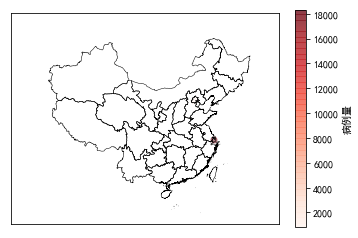

In [42]:
lat = mydata['纬度'].values
lon = mydata['经度'].values
bll = mydata['病例量'].values
# basemap.shadedrelief()
basemap.readshapefile(shapefile = "./bou2_4p",name = "china")
basemap.scatter(lon,lat,latlon = True,c = bll,cmap='Reds', alpha=0.5)
plt.colorbar(label='病例量')
# plt.clim(3, 7)
plt.show()  

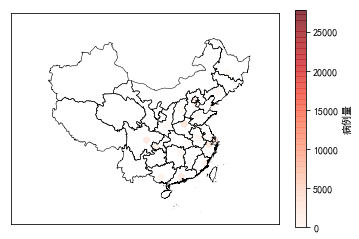

In [44]:
sheet1 = pd.read_excel('各单位地理位置分布.xlsx',sheet_name = 'Sheet1')
sheet1.head(10)
lat = sheet1['纬度'].values
lon = sheet1['经度'].values
bll = sheet1['病例量'].values
# basemap.shadedrelief()
basemap.readshapefile(shapefile = "./bou2_4p",name = "china")
basemap.scatter(lon,lat,latlon = True,c = bll,cmap='Reds', alpha=0.5)
plt.colorbar(label='病例量')
# plt.clim(3, 7)
plt.show()  

KeyError: 'NL_NAME_1'

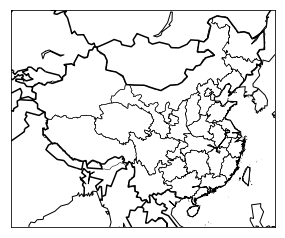

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

m = Basemap(
    llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100
)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()

m.readshapefile(shapefile="./bou2_4p", name="china")
mapData = pd.DataFrame(m.china_info)
mapData["NAME"] = mapData["NAME"].map(
    lambda x: x.decode("gbk") if len(x) != 0 else x)

sheet4 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet4')
province2num = {}
location2num = {}
province2location = {}

for province,_ in province2num.items():
    province2num[province] = location2num[province2location[province]]
        
province2bll = province2num
statenames = []
for shapedict in m.china_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)

colors = {}
# https://matplotlib.org/examples/color/named_colors.html
location_colors = {
    '华东': 'brown', 
    '华北': 'r', 
    '华南': 'g',
    '华中': 'lightyellow',
    '东北': 'cyan', 
    '西北': 'orchid',
    '西南': 'lightpink'
}

for _, row in sheet4.iterrows():
    k1 = '省'
    k2 = '地区'
    colors[row[k1][:2]] = location_colors[row[k2]]

ax = plt.gca()
for idx, seg in enumerate(m.china):
    s = statenames[idx]
    if s in colors:
        color = colors[s]
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)


patchs = []
for location,color in location_colors.items():
    patch = mpatches.Patch(color=color, label=location)
    patchs.append(patch)
    
plt.legend(handles=patchs)
plt.show()

总病例量: 63347


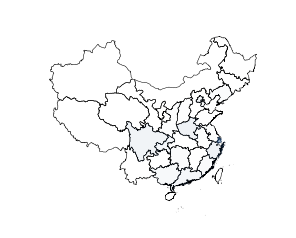

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
# https://zhuanlan.zhihu.com/p/37336863
# 实例化地图对象，并导入本地shp中国地图

font = {'family': 'SimHei'}
matplotlib.rc('font', **font)
# fig = plt.figure(figsize=(16, 12))
fig = plt.figure()
ax = fig.add_subplot(111)

basemap = Basemap(llcrnrlon=75, llcrnrlat=10, urcrnrlon=150,
                  urcrnrlat=55, projection='poly', lon_0=116.65, lat_0=40.02,ax = ax)
basemap.readshapefile(shapefile="./bou2_4p", name="china")
mapData = pd.DataFrame(basemap.china_info)
#导入的shp格式地图中很多行政区划信息乱码，需要纠正编码
mapData["NAME"] = mapData["NAME"].map(
    lambda x: x.decode("gbk") if len(x) != 0 else x)

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet4')
sheet1 = sheet1.replace(['-Inf', 'Inf'], 'null')
sheet1 = sheet1.fillna(0)

total = sum(sheet1['病例量'].tolist())
print('总病例量:',total)

###构建省份上色填充函数：
def plotProvince(row):
    color = (42/256, 87/256, 141/256, row['病例量']/total)
    # color 相当于一个长度为4的tuple
    # 可以根据colormap来确定color的tuple
    patches = []
    # 一个省有多个多边形组成
    for province_, shape in zip(mapData["NAME"].tolist(), basemap.china):
        if province_ == row['省']:
            patches.append(Polygon(xy=np.array(shape), closed=True))
    ax.add_collection(PatchCollection(patches, facecolor=color,
                                      edgecolor=color, linewidths=1., zorder=2))
sheet1.apply(lambda row: plotProvince(row), axis=1)
plt.axis("off")  # 关闭坐标轴
# plt.savefig("save.png") #保存图表到本地
plt.show()  # 显示图表

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
# https://zhuanlan.zhihu.com/p/37336863
# 实例化地图对象，并导入本地shp中国地图

font = {'family': 'SimHei'}
matplotlib.rc('font', **font)
# fig = plt.figure(figsize=(16, 12))
fig = plt.figure()
ax = fig.add_subplot(111)

basemap = Basemap(llcrnrlon=75, llcrnrlat=10, urcrnrlon=150,
                  urcrnrlat=55, projection='poly', lon_0=116.65, lat_0=40.02,ax = ax)
basemap.readshapefile(shapefile="./bou2_4p", name="china")
mapData = pd.DataFrame(basemap.china_info)
#导入的shp格式地图中很多行政区划信息乱码，需要纠正编码
mapData["NAME"] = mapData["NAME"].map(
    lambda x: x.decode("gbk") if len(x) != 0 else x)

sheet1 = pd.read_excel('各单位地理位置分布.xlsx', sheet_name='Sheet4')
sheet1 = sheet1.replace(['-Inf', 'Inf'], 'null')
sheet1 = sheet1.fillna(0)
total = sum(sheet1['病例量'].tolist())

###构建省份上色填充函数：
def plotProvince(row):
    color = (42/256, 87/256, 141/256, row['病例量']/total)
    # color 相当于一个长度为4的tuple
    # 可以根据colormap来确定color的tuple
    patches = []
    # 一个省有多个多边形组成
    for province_, shape in zip(mapData["NAME"].tolist(), basemap.china):
        if province_ == row['省']:
            patches.append(Polygon(xy=np.array(shape), closed=True))
    ax.add_collection(PatchCollection(patches, facecolor=color,
                                      edgecolor=color, linewidths=1., zorder=2))
sheet1.apply(lambda row: plotProvince(row), axis=1)
plt.axis("off")  # 关闭坐标轴
# plt.savefig("save.png") #保存图表到本地
plt.show()  # 显示图表